Import Tools

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score,recall_score,plot_roc_curve,roc_curve,roc_auc_score

Get our Data Ready

In [3]:
df=pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Heart Disease Frequency according to Sex

In [6]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


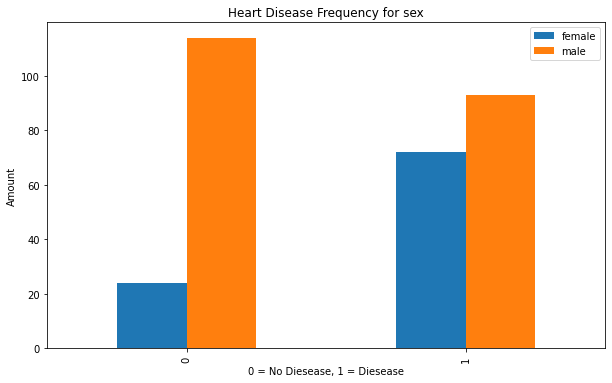

In [16]:
#Plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6))
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Diesease, 1 = Diesease")
plt.ylabel("Amount")
plt.legend(["female","male"]);

Age vs. Max Heart Rate for Heart Disease

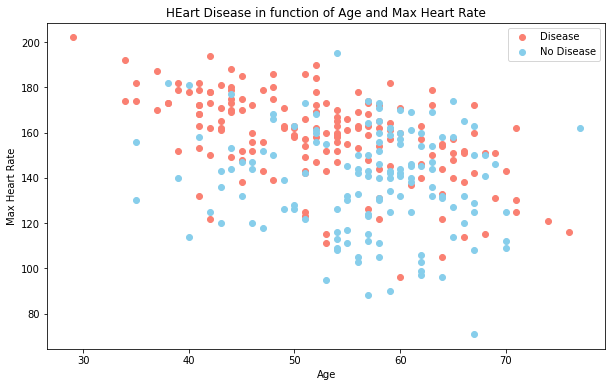

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='skyblue');
plt.title("HEart Disease in function of Age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

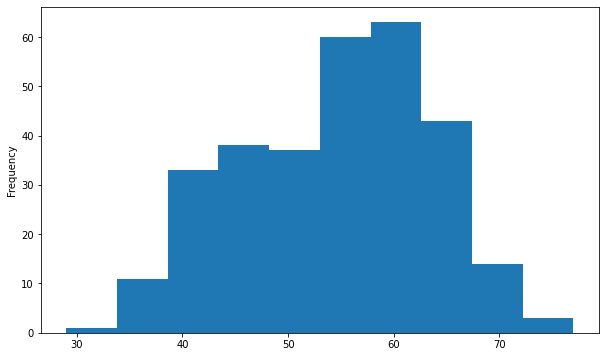

In [19]:
#check the Distribution of the age column with hist
df.age.plot.hist(figsize=(10,6));

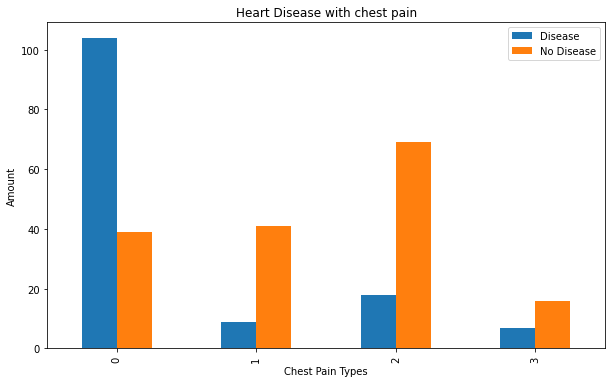

In [22]:
#Heart Disease Frequency per Chest Pain Type
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6))
plt.title("Heart Disease with chest pain")
plt.xlabel("Chest Pain Types")
plt.ylabel("Amount")
plt.legend(['Disease','No Disease']);

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


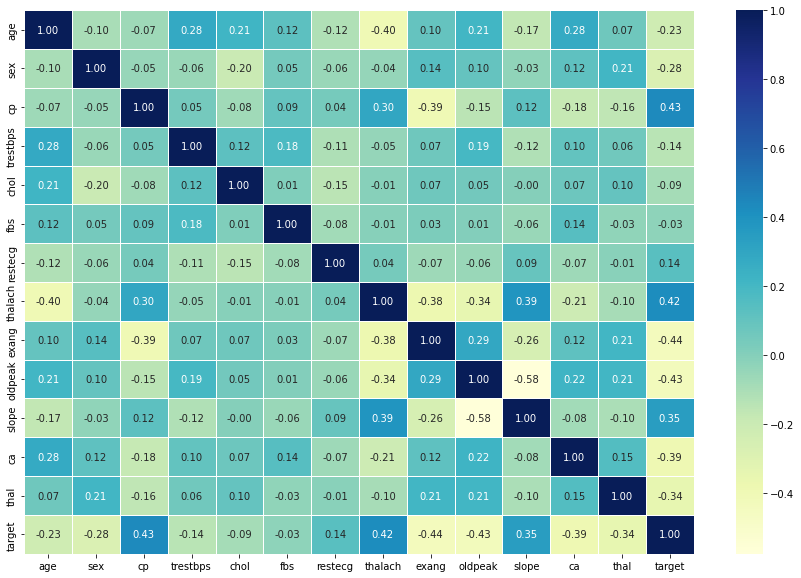

In [31]:
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu');

Modelling

In [32]:
X=df.drop('target',axis=1)
Y=df['target']

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [37]:
models={
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'Random Forest':RandomForestClassifier()
}

In [38]:
def fit_and_Score(model,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_Scores={}
    for name,model in model.items():
        model.fit(x_train,y_train)
        model_Scores[name]=model.score(x_test,y_test)
    return model_Scores

In [40]:
modelScore=fit_and_Score(models,X_train,X_test,Y_train,Y_test)

c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


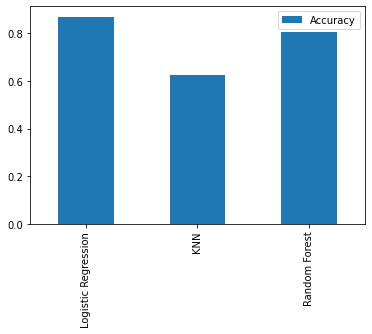

In [42]:
model_compare=pd.DataFrame(modelScore,index=["Accuracy"])
model_compare.T.plot.bar();

HyperParameter Tuning

In [55]:
train_scores=[]
test_score=[]
neighbors=range(1,200)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))

In [56]:
train_scores,test_score

([1.0,
  0.8264462809917356,
  0.7975206611570248,
  0.7727272727272727,
  0.78099173553719,
  0.7768595041322314,
  0.7520661157024794,
  0.731404958677686,
  0.7479338842975206,
  0.7272727272727273,
  0.7520661157024794,
  0.7396694214876033,
  0.7644628099173554,
  0.743801652892562,
  0.71900826446281,
  0.7066115702479339,
  0.7066115702479339,
  0.7231404958677686,
  0.7355371900826446,
  0.743801652892562,
  0.7479338842975206,
  0.7396694214876033,
  0.7479338842975206,
  0.7396694214876033,
  0.743801652892562,
  0.7479338842975206,
  0.7355371900826446,
  0.743801652892562,
  0.743801652892562,
  0.7520661157024794,
  0.743801652892562,
  0.731404958677686,
  0.7396694214876033,
  0.71900826446281,
  0.731404958677686,
  0.7066115702479339,
  0.731404958677686,
  0.7107438016528925,
  0.7231404958677686,
  0.6900826446280992,
  0.7024793388429752,
  0.6983471074380165,
  0.6983471074380165,
  0.6859504132231405,
  0.6942148760330579,
  0.6983471074380165,
  0.685950413223140

Maximum KNN score on the test Data : 65.57% 
Maximum KNN score on the test Data : 100.00% 


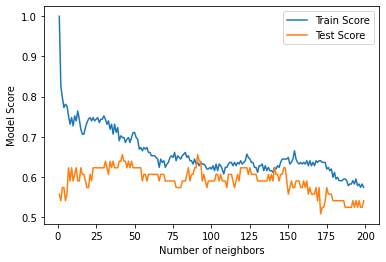

In [57]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_score,label='Test Score')
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();
print(f"Maximum KNN score on the test Data : {max(test_score)*100:.2f}% ")
print(f"Maximum KNN score on the test Data : {max(train_scores)*100:.2f}% ")

HyperParameter tuning with RandomizedSearhCV

In [63]:
log_reg_grid={
    'C':np.logspace(-4,4,20),
    'solver':["liblinear"]
}
rf_grid={
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
}

In [59]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [60]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [61]:
rs_log_reg.score(X_test,Y_test)

0.8360655737704918

In [70]:
rs_rand_clf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=2)
rs_rand_clf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=360; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=360; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=360; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=660; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=660; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=660; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=660; total time=   0.7s
[CV] E

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [71]:
rs_rand_clf.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=960)

In [72]:
rs_rand_clf.score(X_test,Y_test)

0.8360655737704918

In [73]:
log_red_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
gs_log_grid={
    
}

In [74]:
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_red_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [75]:
gs_log_reg.best_estimator_

LogisticRegression(C=0.7278953843983146, solver='liblinear')

In [76]:
gs_log_reg.score(X_test,Y_test)

0.8360655737704918

<h2>Evaluting Our Mechine Learning Model</h2>

In [77]:
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [80]:
np.random.seed(seed=42)
Y_probs=gs_log_reg.predict_proba(X_test)
Y_probs_positive=Y_probs[:,1]
ftr,ptr,threshold=roc_curve(Y_test,Y_probs_positive)
ftr,ptr,threshold

(array([0.        , 0.        , 0.        , 0.03571429, 0.03571429,
        0.07142857, 0.07142857, 0.10714286, 0.10714286, 0.5       ,
        0.5       , 0.64285714, 0.64285714, 0.82142857, 0.82142857,
        1.        ]),
 array([0.        , 0.03030303, 0.3030303 , 0.3030303 , 0.75757576,
        0.75757576, 0.78787879, 0.78787879, 0.90909091, 0.90909091,
        0.93939394, 0.93939394, 0.96969697, 0.96969697, 1.        ,
        1.        ]),
 array([1.97601715, 0.97601715, 0.91190472, 0.90561571, 0.67838808,
        0.66943081, 0.667393  , 0.66091891, 0.60613999, 0.17657287,
        0.14590462, 0.09740738, 0.08440956, 0.04152225, 0.03543961,
        0.006817  ]))

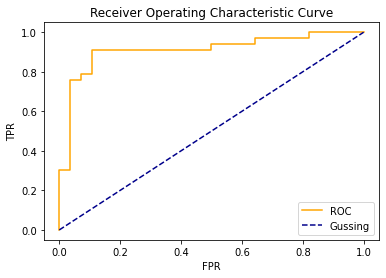

In [88]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label="ROC")
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label="Gussing")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()
plot_roc_curve(ftr,ptr)

In [84]:
roc_auc_score(Y_test,Y_probs_positive)

0.9090909090909092

c:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


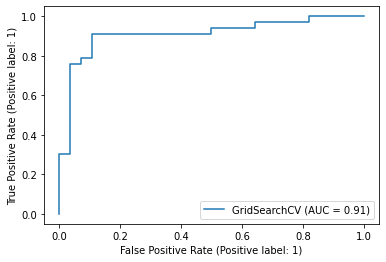

In [87]:
plot_roc_curve(gs_log_reg,X_test,Y_test)

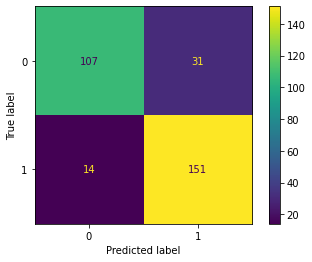

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=gs_log_reg,X=X,y=Y);

In [90]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



In [91]:
cross_val_score(estimator=gs_log_reg,X=X,y=Y,cv=5,scoring=None)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.81967213, 0.90163934, 0.8852459 , 0.86666667, 0.75      ])

In [93]:
cross_val_score(estimator=gs_log_reg,X=X,y=Y,cv=5,scoring='precision')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.775     , 0.88571429, 0.86111111, 0.85714286, 0.725     ])

In [94]:
cross_val_score(estimator=gs_log_reg,X=X,y=Y,cv=5,scoring='recall')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.93939394, 0.93939394, 0.93939394, 0.90909091, 0.87878788])

In [95]:
cross_val_score(estimator=gs_log_reg,X=X,y=Y,cv=5,scoring='f1')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.84931507, 0.91176471, 0.89855072, 0.88235294, 0.79452055])

<h2>Feature Importance</h2>

In [97]:
clf=LogisticRegression(C=0.7278953843983146,solver='liblinear')
clf.fit(X_train,Y_train);

In [98]:
clf.coef_

array([[ 0.01518413, -1.41321784,  0.74601777, -0.01809572, -0.00514983,
        -0.25570118,  0.35192357,  0.03582448, -0.49593823, -0.42179122,
         0.41811425, -0.80970226, -0.82969153]])

In [99]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.015184134168310152,
 'sex': -1.4132178376580906,
 'cp': 0.7460177667420164,
 'trestbps': -0.01809572430948382,
 'chol': -0.005149832319402663,
 'fbs': -0.2557011826192741,
 'restecg': 0.35192356815721115,
 'thalach': 0.03582447563755576,
 'exang': -0.49593823362963374,
 'oldpeak': -0.42179121910648854,
 'slope': 0.4181142469142928,
 'ca': -0.8097022576081805,
 'thal': -0.8296915277954744}

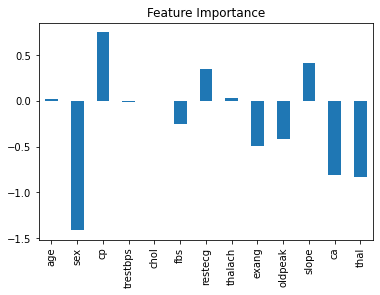

In [109]:
main_feature=pd.DataFrame(feature_dict,index=[0])
main_feature.T.plot.bar(title="Feature Importance",legend=False);